In [1]:
!pip install keras

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error

In [6]:
gas_turbines=pd.read_csv("gas_turbines.csv")
gas_turbines

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [7]:
gas_turbines[gas_turbines.duplicated()].shape


(0, 11)

In [8]:
gas_turbines.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [9]:
gas_turbines.isnull().sum()


AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [10]:
X = gas_turbines.loc[:,['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO','NOX']]
y= gas_turbines.loc[:,['TEY']]

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
y=scaler.fit_transform(y)

In [14]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)
X_test_scaled


array([[ 0.82623246, -0.43954308, -0.25924569, ...,  0.10039242,
        -0.3796304 , -0.69217007],
       [ 0.35282087,  0.23279782,  0.80230139, ..., -1.18541222,
         0.39149515, -1.09475442],
       [ 0.32839008, -0.07135639,  0.25312287, ...,  0.01665304,
        -0.00296896, -0.31891741],
       ...,
       [-0.74071701,  0.37687087,  0.43427425, ...,  1.77157829,
        -1.00127821, -0.4818816 ],
       [-0.49965786, -0.39151873,  0.64680105, ..., -0.26517949,
        -0.48137538,  0.12808615],
       [ 0.13151427,  0.32884652,  0.98830762, ..., -1.40331469,
         0.13152215, -0.64456466]])

In [15]:
#Define the keras model
model=Sequential()
model.add(Dense(12,input_dim=10,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [16]:
#complile the model
model.compile(loss='mean_squared_error',optimizer='adam',metrics = ['MeanSquaredError'])


In [17]:
#fit the keras model in dataset
history=model.fit(X_train_scaled, y_train,epochs=150,validation_split=0.1,batch_size=10)

Epoch 1/150
1219/1219 [==============================] - 7s 4ms/step - loss: 0.5991 - mean_squared_error: 0.5991 - val_loss: 0.5434 - val_mean_squared_error: 0.5434
Epoch 2/150
1219/1219 [==============================] - 4s 3ms/step - loss: 0.5618 - mean_squared_error: 0.5618 - val_loss: 0.5423 - val_mean_squared_error: 0.5423
Epoch 3/150
1219/1219 [==============================] - 3s 2ms/step - loss: 0.5610 - mean_squared_error: 0.5610 - val_loss: 0.5417 - val_mean_squared_error: 0.5417
Epoch 4/150
1219/1219 [==============================] - 3s 2ms/step - loss: 0.5606 - mean_squared_error: 0.5606 - val_loss: 0.5415 - val_mean_squared_error: 0.5415
Epoch 5/150
1219/1219 [==============================] - 3s 2ms/step - loss: 0.5603 - mean_squared_error: 0.5603 - val_loss: 0.5412 - val_mean_squared_error: 0.5412
Epoch 6/150
1219/1219 [==============================] - 3s 2ms/step - loss: 0.5601 - mean_squared_error: 0.5601 - val_loss: 0.5409 - val_mean_squared_error: 0.5409
Epoch 7/15

1219/1219 [==============================] - 3s 3ms/step - loss: 0.5590 - mean_squared_error: 0.5590 - val_loss: 0.5399 - val_mean_squared_error: 0.5399
Epoch 51/150
1219/1219 [==============================] - 3s 3ms/step - loss: 0.5589 - mean_squared_error: 0.5589 - val_loss: 0.5399 - val_mean_squared_error: 0.5399
Epoch 52/150
1219/1219 [==============================] - 3s 2ms/step - loss: 0.5589 - mean_squared_error: 0.5589 - val_loss: 0.5399 - val_mean_squared_error: 0.5399
Epoch 53/150
1219/1219 [==============================] - 3s 2ms/step - loss: 0.5589 - mean_squared_error: 0.5589 - val_loss: 0.5402 - val_mean_squared_error: 0.5402
Epoch 54/150
1219/1219 [==============================] - 3s 2ms/step - loss: 0.5589 - mean_squared_error: 0.5589 - val_loss: 0.5399 - val_mean_squared_error: 0.5399
Epoch 55/150
1219/1219 [==============================] - 3s 2ms/step - loss: 0.5589 - mean_squared_error: 0.5589 - val_loss: 0.5399 - val_mean_squared_error: 0.5399
Epoch 56/150
1219

1219/1219 [==============================] - 3s 2ms/step - loss: 0.5589 - mean_squared_error: 0.5589 - val_loss: 0.5399 - val_mean_squared_error: 0.5399
Epoch 100/150
1219/1219 [==============================] - 3s 2ms/step - loss: 0.5589 - mean_squared_error: 0.5589 - val_loss: 0.5399 - val_mean_squared_error: 0.5399
Epoch 101/150
1219/1219 [==============================] - 3s 2ms/step - loss: 0.5589 - mean_squared_error: 0.5589 - val_loss: 0.5398 - val_mean_squared_error: 0.5398
Epoch 102/150
1219/1219 [==============================] - 3s 2ms/step - loss: 0.5589 - mean_squared_error: 0.5589 - val_loss: 0.5399 - val_mean_squared_error: 0.5399
Epoch 103/150
1219/1219 [==============================] - 3s 2ms/step - loss: 0.5589 - mean_squared_error: 0.5589 - val_loss: 0.5398 - val_mean_squared_error: 0.5398
Epoch 104/150
1219/1219 [==============================] - 3s 2ms/step - loss: 0.5589 - mean_squared_error: 0.5589 - val_loss: 0.5400 - val_mean_squared_error: 0.5400
Epoch 105/15

1219/1219 [==============================] - 3s 2ms/step - loss: 0.5589 - mean_squared_error: 0.5589 - val_loss: 0.5399 - val_mean_squared_error: 0.5399
Epoch 149/150
1219/1219 [==============================] - 3s 2ms/step - loss: 0.5589 - mean_squared_error: 0.5589 - val_loss: 0.5399 - val_mean_squared_error: 0.5399
Epoch 150/150
1219/1219 [==============================] - 3s 2ms/step - loss: 0.5589 - mean_squared_error: 0.5589 - val_loss: 0.5399 - val_mean_squared_error: 0.5399


In [18]:
test_loss, mean_squared_error = model.evaluate(X_test_scaled, y_test)

47/47 [==============================] - 0s 2ms/step - loss: 0.5650 - mean_squared_error: 0.5650


In [19]:
#list all data in history
print(history.history.keys())

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


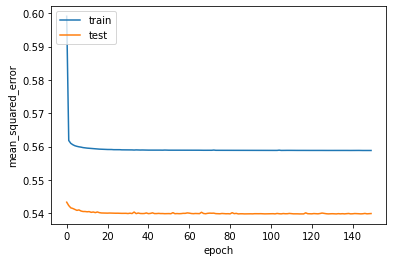

In [20]:
#Sumarize History for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.ylabel("mean_squared_error")
plt.xlabel("epoch")
plt.legend(['train','test'],loc='upper left')
plt.show()


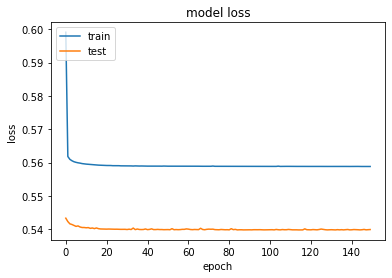

In [21]:
#Sumarize history for loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train','test'],loc='upper left')
plt.show()